# DATASET OVERVIEW

- The dataset contains 79 samples with 7 feature columns and 1 target column.

- The feature columns are:
    - 'gravity'- Urine specific gravity, Urine density relative to water, which indicates the concentration of dissolved substances.
    
    - 'ph'- Urine pH, A scale ranging from 1 to 14 that measures the acidity or alkalinity of an aqueous solution; 7 being neutral. 
    
    - 'osmo'- Osmolality, the concentration of osmoles (particles that contribute to osmotic pressure) in a solution, expressed as milliosmoles per liter (mOsm/L) in biological systems.
       
    - 'cond' - Conductivity, a measure of a liquid's ability to conduct electricity, which depends on the number of ions per unit volume and their drift velocity.
        
    - 'urea' - Urea concentration in the urine, measured in millimoles per liter (mmol/L). 
    
    - 'calc' - Calcium concentration in the urine, measured in millimoles per liter (mmol/L).

- The 'target' column indicates if a kidney stone is present (1) or not (0). 

- With only 79 rows, this is a small dataset. The key predictive features are expected to be 'ph', 'calc', and possibly 'osmo' and 'cond' which are known urine markers for kidney stones.

- This dataset can be used to train and evaluate small machine learning models to predict if a patient has kidney stones based on urine test results.

- The goal remains to predict if a patient has kidney stones based on urine test metrics.


In [1]:
# Importing Liberaries and datset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


C:\Users\akash\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('kindey stone urine analysis.csv')

In [4]:
df.head() 

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [5]:
df.tail()

,gravity,ph,osmo,cond,urea,calc,target
74,1.025,7.90,721,23.6,301,9.04,1
75,1.017,4.81,410,13.3,195,0.58,1
76,1.024,5.40,803,21.8,394,7.82,1
77,1.016,6.81,594,21.4,255,12.20,1
78,1.015,6.03,416,12.8,178,9.39,1


## EDA and Data Cleaning

In [6]:
df.shape

(79, 7)

In [7]:
df.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB


In [9]:
df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.018114,6.028481,612.848101,20.813924,266.405063,4.138987,0.430380
std,0.007239,0.724307,237.514755,7.938994,131.254550,3.260051,0.498293
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,413.000000,14.150000,160.000000,1.460000,0.000000
50%,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000,0.000000
75%,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [12]:
df.nunique()

gravity    29
ph         70
osmo       77
cond       64
urea       73
calc       75
target      2
dtype: int64

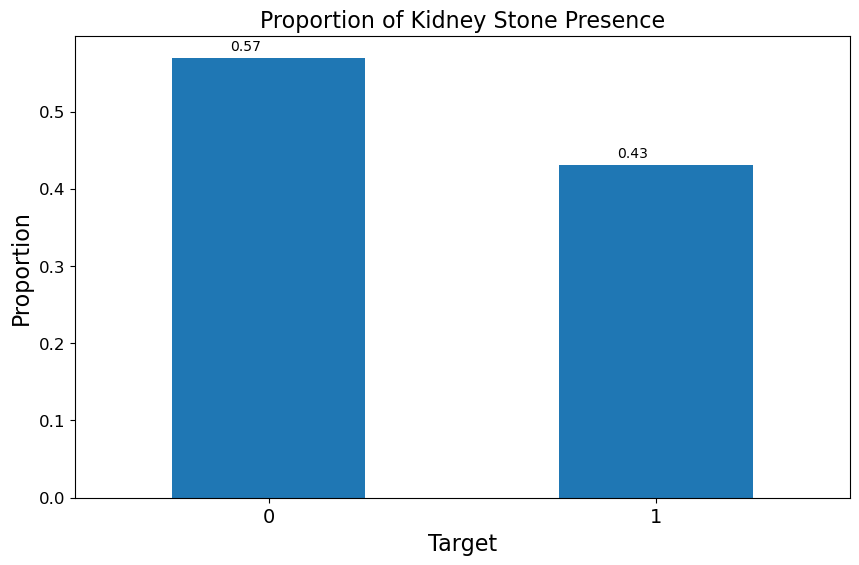

In [13]:
target_counts = df['target'].value_counts(normalize=True)

ax = target_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_xlabel('Target', fontsize=16)
ax.set_ylabel('Proportion', fontsize=16)
ax.set_title('Proportion of Kidney Stone Presence', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0, fontsize=14)
plt.yticks(fontsize=12)

for i, v in enumerate(target_counts):
    ax.text(i - 0.1, v + 0.01, f'{v:.2f}', fontsize=10, color='black')

plt.show()

## Finding Outliers
we can find outliers by two ways:

### 1. Boxplot:
The box in a boxplot represents the interquartile range (IQR) between Q1 and Q3. The line inside the box indicates the median. The whiskers extend from the box to the minimum and maximum values. Any points outside the whiskers are considered outliers.

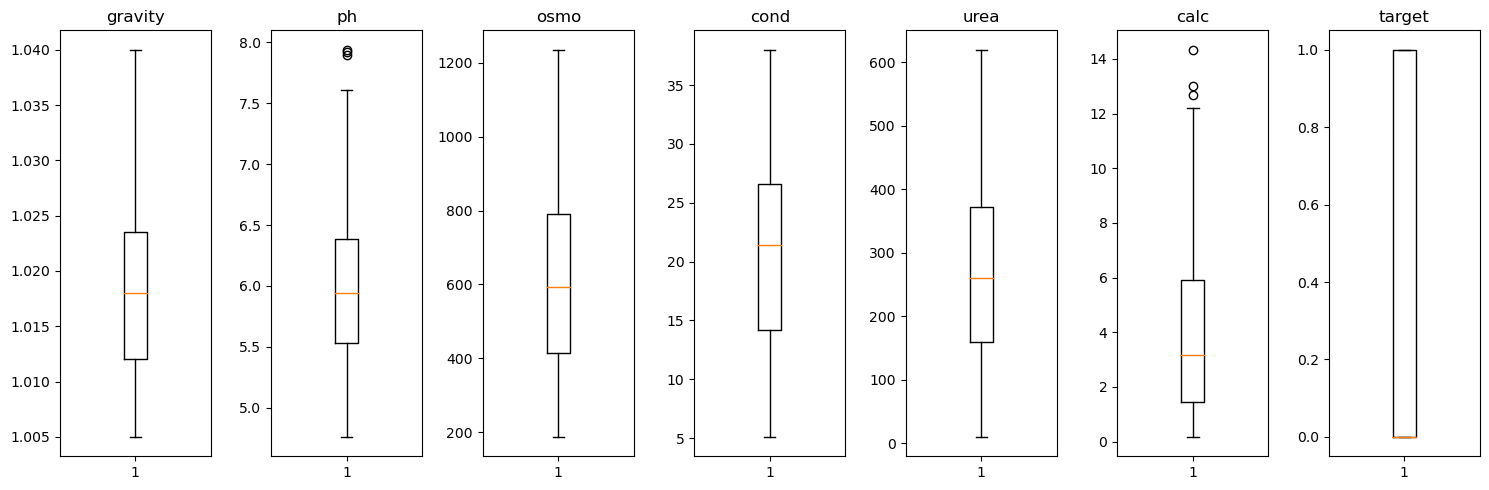

In [14]:
# Create boxplots
fig, axs = plt.subplots(1, 7, figsize=(15, 5))
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
    
plt.tight_layout()
plt.show()

#### Insights
- As we can see there are very less outliers in ph,and calc column which does not affect on the dataset.

### 2. z- score:
z-scores allow us to compare observations in terms of how far from average they are on each feature.They put the variables on a common scale. Observations with z-scores > 2 or < -2 could be considered outliers on that feature.

In [15]:
# Z-scores
df_std = df.copy()
for col in df.columns:
    df_std[col] = (df[col] - df[col].mean()) / df[col].std()
    
print(df_std.head())

    gravity        ph      osmo      cond      urea      calc    target
0  0.398658 -1.544208  0.472189 -0.858286  1.345439 -0.518086 -0.863708
1 -0.153868 -0.398286 -0.150930 -0.102522  0.225477  0.107671 -0.863708
2 -1.397053  1.617434 -1.228758 -0.744921 -1.260185 -0.545693 -0.863708
3 -0.982658 -0.715830 -0.862465 -1.034630 -0.323075 -0.610109 -0.863708
4 -1.811448  0.678606 -1.792933 -1.677029 -1.336373 -0.913785 -0.863708


#### Insights
- The 1st observation has a very high urea z-score (1.345). This means its urea value is 1.345 standard deviations above the mean urea. So it has a relatively high urea level.

- The 2nd observation has z-scores close to 0 for all variables. This means its values are close to the average for each feature.

- The 3rd observation has a very low gravity z-score (-1.397) and osmo z-score (-1.229). So it has unusually low gravity and osmo.

- All the target z-scores are identical (-0.864). This suggests there is no variability in the target variable. Its standard deviation is likely 0.


# Treating Outliers

In [27]:
columns_with_outliers = ['ph', 'calc']  

# Function to treat outliers using IQR method
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with the nearest bound
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return df

# Loop through the specified columns and treat outliers
for column in columns_with_outliers:
    df1 = treat_outliers_iqr(df, column)

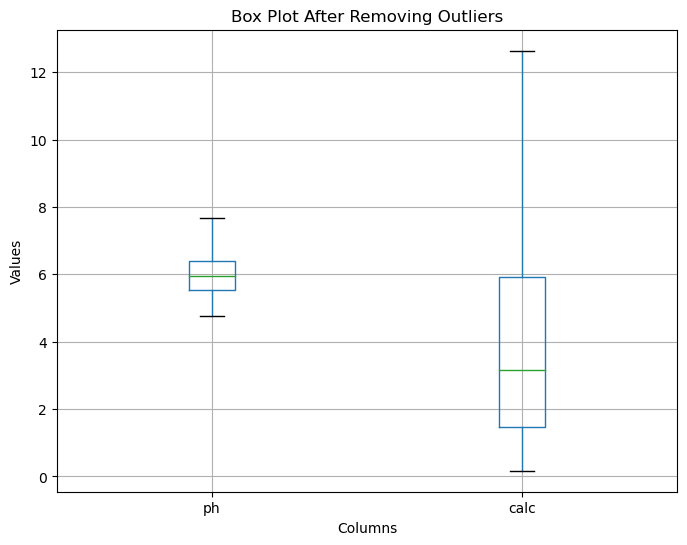

In [32]:
# Plot box plot after removing outliers for specified columns
plt.figure(figsize=(8, 6))
df1[columns_with_outliers].boxplot()
plt.title('Box Plot After Removing Outliers')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.show()

## Correlation b/w variables

In [33]:
df.corr()

,gravity,ph,osmo,cond,urea,calc,target
gravity,1.000000,-0.266714,0.861466,0.559064,0.823477,0.529456,0.419818
ph,-0.266714,1.000000,-0.249359,-0.104454,-0.284662,-0.123746,-0.122637
osmo,0.861466,-0.249359,1.000000,0.812780,0.871178,0.528694,0.231834
cond,0.559064,-0.104454,0.812780,1.000000,0.495405,0.355207,0.059717
urea,0.823477,-0.284662,0.871178,0.495405,1.000000,0.511309,0.258402
calc,0.529456,-0.123746,0.528694,0.355207,0.511309,1.000000,0.541114
target,0.419818,-0.122637,0.231834,0.059717,0.258402,0.541114,1.000000


<AxesSubplot:>

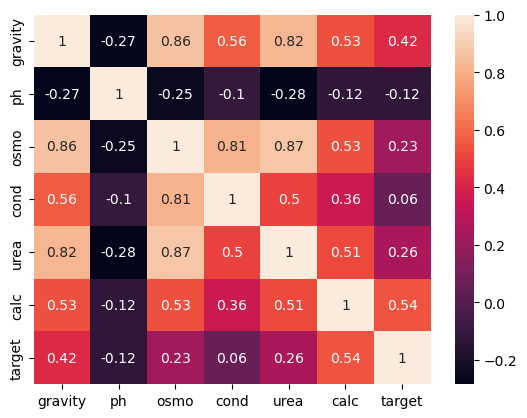

In [34]:
# Creating correlation heatmap

sns.heatmap(df.corr(),annot=True)

#### Insights
- There is a strong positive correlation between gravity and osmo (0.86). As gravity increases, osmo also tends to increase.
- Urea is positively correlated with gravity (0.82) and osmo (0.87). So urea levels also increase as gravity and osmo increase.
- Target has a moderate positive correlation with Ca (0.54). Higher Ca values tend to be associated with higher target values.
- Target has a weak negative correlation with ph (-0.12). Lower pH is slightly associated with higher target.
- Target has very little correlation with cond (0.06). These two variables seem to be unrelated.

## Splitting dataset into training and testing

In [35]:
X = df.drop(columns=['target'])  
y = df['target']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building 

In [39]:
# Model 1: Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Predictions
logreg_predictions = logreg_model.predict(X_test)

# Evaluate Random Forest model
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic regression Accuracy:", logreg_accuracy)
print("Classification Report:")
print(classification_report(y_test, logreg_predictions))

Logistic regression Accuracy: 0.6875
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.50      0.60      0.55         5

    accuracy                           0.69        16
   macro avg       0.65      0.66      0.65        16
weighted avg       0.71      0.69      0.69        16



In [40]:
# Model 2: Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predictions
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluate Random Forest model
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print("Random Forest Classifier Accuracy:", random_forest_accuracy)
print("Classification Report:")
print(classification_report(y_test, random_forest_predictions))

Random Forest Classifier Accuracy: 0.8125
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.75      0.60      0.67         5

    accuracy                           0.81        16
   macro avg       0.79      0.75      0.77        16
weighted avg       0.81      0.81      0.81        16



In [41]:
# Model 3: XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Classifier Accuracy:", xgb_accuracy)
print("Classification Report:")
print(classification_report(y_test, xgb_predictions))

XGBoost Classifier Accuracy: 0.625
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.40      0.40      0.40         5

    accuracy                           0.62        16
   macro avg       0.56      0.56      0.56        16
weighted avg       0.62      0.62      0.62        16



In [42]:
# Model 4: Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions
decision_tree_predictions = decision_tree_model.predict(X_test)

# Evaluate Decision Tree model
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Classification Report:")
print(classification_report(y_test, decision_tree_predictions))

Decision Tree Accuracy: 0.625
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.43      0.60      0.50         5

    accuracy                           0.62        16
   macro avg       0.60      0.62      0.60        16
weighted avg       0.67      0.62      0.64        16



In [45]:
# Compare model accuracies
model_accuracies = {
    "Logistic Regression": logreg_accuracy,
    "Decision Trees": decision_tree_accuracy,
    "Random Forest": random_forest_accuracy,
    "XGBoost": xgb_accuracy
}

best_model = max(model_accuracies, key=model_accuracies.get)
print("Model Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.2f}")

print(f"The best model is: {best_model} with an accuracy of {model_accuracies[best_model]:.2f}")

# Create a DataFrame
accuracy_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

# Sort the DataFrame by accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Print the DataFrame
accuracy_df


Model Accuracies:
Logistic Regression: 0.69
Decision Trees: 0.62
Random Forest: 0.81
XGBoost: 0.62
The best model is: Random Forest with an accuracy of 0.81


,Model,Accuracy
0,Random Forest,0.8125
1,Logistic Regression,0.6875
2,Decision Trees,0.6250
3,XGBoost,0.6250


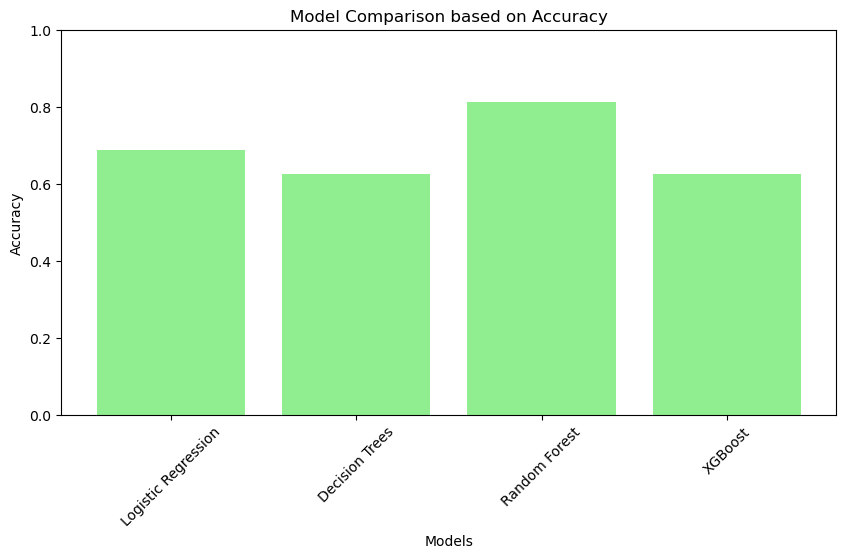

In [44]:
# List of models and their respective accuracies
models = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'XGBoost']
accuracies = [logreg_accuracy, decision_tree_accuracy, random_forest_accuracy, xgb_accuracy]

# Plotting the accuracies
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies,color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison based on Accuracy')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy percentage
plt.xticks(rotation=45)  # Rotate model names for better visibility
plt.show()

# Conclusion

##### "In the analysis of kidney stone prediction using urine analysis data, we compared the performance of several machine learning models."
- From the results, it is clear that the Random Forest model outperformed the other models with an accuracy of 0.81, making it the best model for predicting kidney stones. 
- While Logistic Regression serves as a straightforward baseline model, it demonstrated a lower accuracy of 0.68. 
- Decision Trees and XGBoost, both tree-based methods, achieved accuracies of 0.62.
- The selection of the Random Forest model as the best performer suggests its suitability for practical applications in kidney stone prediction based on urine analysis. 